# Lab 11 - Part 2: Clustering

## 0 - General Imports

In [136]:
import numpy as np
import os
from sklearn.cluster import *
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)

## 1. Image Segmentation

In [137]:
from matplotlib.image import imread
filename="tree.jpg"
image = imread(filename)
image.shape

(1414, 2121, 3)

In [138]:
X = image.reshape(-1, 3)


In [139]:
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

segmented_imgs = []
n_colors=(16, 8, 4)
for n_clusters in n_colors:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
        segmented_img=kmeans.cluster_centers_[kmeans.labels_]
        segmented_imgs.append(segmented_img.reshape(image.shape))



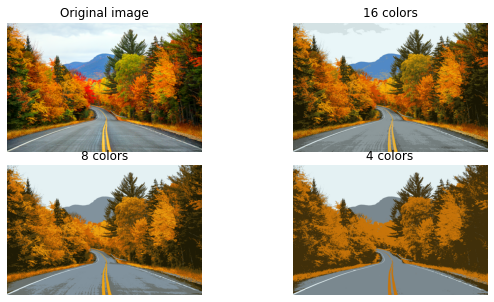

In [140]:
# plot images

plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(221)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(222 + idx)
    plt.imshow(segmented_imgs[idx].astype(int))
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.savefig('image_segmentation_diagram', tight_layout=False)
plt.show()



## 2. Clustering Algorithm Comparison¶

In [141]:
from sklearn import datasets

noisy_circles = datasets.make_circles(n_samples=1500, factor=0.5, noise=0.05)
X, y = noisy_circles

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

In [142]:
# clustering algorithm setups and predictions placed in this cell
mbk = cluster.MiniBatchKMeans(n_clusters=3)
mbk.fit(X, y)
k_means = KMeans(n_clusters=3)
k_means.fit(X, y)

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=1500)
meanshift = cluster.MeanShift(bandwidth =bandwidth)
meanshift.fit(X, y)

dbscan = cluster.DBSCAN(eps=0.3, min_samples=20)
dbscan.fit(X, y)

AC = cluster.AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=2)
AC.fit(X, y)



AgglomerativeClustering()

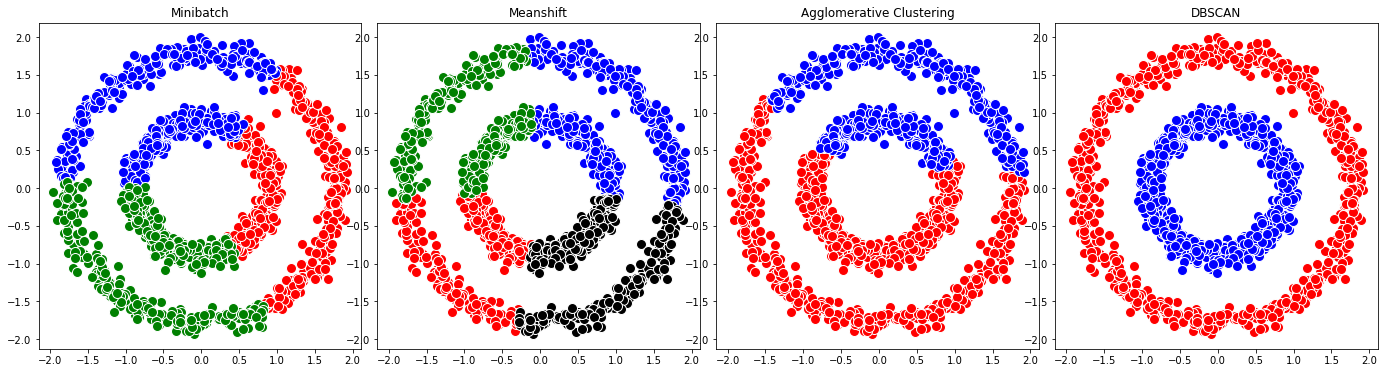

In [144]:
# code for plotting placed in this cell

plt.figure(figsize=(24,6))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

#MiniBatch plot
labels = mbk.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
colors = ['red', 'blue', 'green']
plt.subplot(141)
plt.title("Minibatch")
for k, col in zip(range(n_clusters), colors):
    my_members = labels == k
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='.', markersize = 20)

#Meanshift plot
plt.subplot(142)
plt.title("Meanshift")
labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

colors = ['red', 'blue', 'green', 'black']
for k in range(n_clusters_):
    my_members = labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1], c=colors[k], s=100, edgecolors='white')

#Agglomerative Clustering plot
plt.subplot(143)
plt.title("Agglomerative Clustering")
labels = AC.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

colors = ['red', 'blue']
for k in range(n_clusters_):
    my_members = labels == k
    plt.scatter(X[my_members, 0], X[my_members, 1], c=colors[k], s=100, edgecolors='white')

#DBSCAN plot
plt.subplot(144)
plt.title("DBSCAN")
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = ['red', 'blue']
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=col,
        markeredgecolor="white",
        markersize=10
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=col,
        markeredgecolor="white",
        markersize=10,
    )







